In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [5]:
# Load the dataset to examine its content
file_path = 'DATA HARGA RUMAH JAKSEL.xlsx'
df = pd.read_excel(file_path)


In [17]:
# Display the first few rows of the dataset to understand its structure
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  112 non-null    object
 1   Unnamed: 1  112 non-null    object
 2   Unnamed: 2  112 non-null    object
 3   Unnamed: 3  112 non-null    object
 4   Unnamed: 4  112 non-null    object
 5   Unnamed: 5  112 non-null    object
 6   Unnamed: 6  112 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


(    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
 0        HARGA         LT         LB        JKT        JKM        GRS   
 1  28000000000       1100        700          5          6        ADA   
 2  19000000000        824        800          4          4        ADA   
 3   4700000000        500        400          4          3        ADA   
 4   4900000000        251        300          5          4        ADA   
 
   Unnamed: 6  
 0       KOTA  
 1     JAKSEL  
 2     JAKSEL  
 3     JAKSEL  
 4     JAKSEL  ,
 None)

In [7]:
# Remove the extra header and clean the data
df_cleaned = pd.read_excel(file_path, skiprows=1)
df_cleaned.columns = ['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']

In [8]:
# Display the first few rows after cleaning
df_cleaned.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


In [12]:
# Select relevant features for clustering
features = df_cleaned[['LT', 'LB', 'JKT', 'JKM']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

# Show the data with cluster labels
df_cleaned[['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'Cluster']].head()

,HARGA,LT,LB,JKT,JKM,Cluster
0,28000000000,1100,700,5,6,1
1,19000000000,824,800,4,4,0
2,4700000000,500,400,4,3,2
3,4900000000,251,300,5,4,2
4,28000000000,1340,575,4,5,0


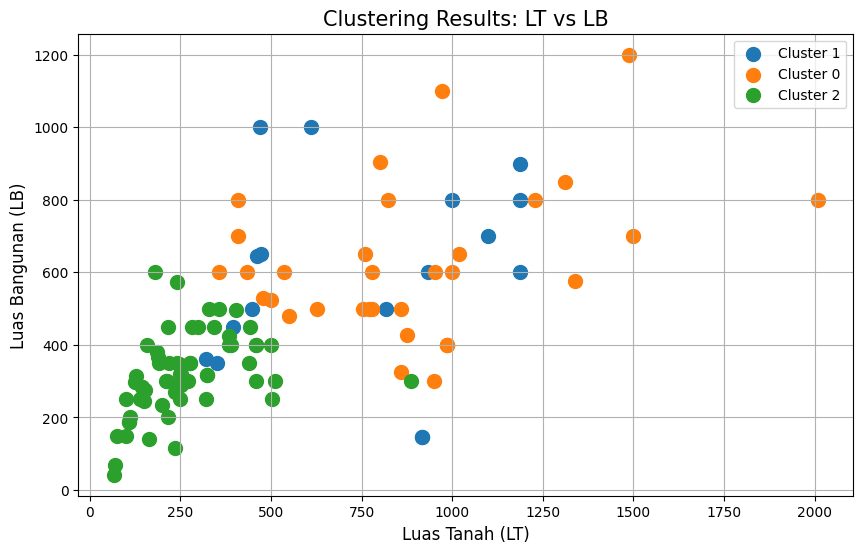

In [15]:
# Scatter plot of LT vs LB colored by cluster
plt.figure(figsize=(10, 6))

# Plot each cluster with different color
for cluster in df_cleaned['Cluster'].unique():
    clustered_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    plt.scatter(clustered_data['LT'], clustered_data['LB'], label=f'Cluster {cluster}', s=100)

# Adding labels and title
plt.title('Clustering Results: LT vs LB', fontsize=15)
plt.xlabel('Luas Tanah (LT)', fontsize=12)
plt.ylabel('Luas Bangunan (LB)', fontsize=12)
plt.legend()
plt.grid(True)